# <span style="color:#2E86C1;">Sujet 5 — Convergences et représentations graphiques</span>

## <span style="color:#1F618D;">Introduction</span>

Ce projet vise à illustrer graphiquement différents phénomènes de convergence des lois de probabilité :
- la convergence d’une loi **binomiale** vers une loi **de Poisson**,  
- la convergence d’une loi **de Poisson** vers une loi **normale**,  
- et le **théorème de la limite centrée** (ou TCL).

Ces expérimentations permettront d’observer comment des distributions discrètes ou continues tendent à se rapprocher
d’un comportement normal lorsque leurs paramètres ou leur taille d’échantillon augmentent.

---

## <span style="color:#1F618D;">Sommaire</span>

1. [Imports nécessaires](#imports-nécessaires)  
2. [Lois de Poisson](#lois-de-poisson)  
3. [Lois binomiales](#lois-binomiales)  
4. [Lois normales](#lois-normales)  
5. [Convergence Binomiale → Poisson](#convergence-binomiale--poisson)  
6. [Convergence Poisson → Normale](#convergence-poisson--normale)  
7. [Théorème de la limite centrée](#théorème-de-la-limite-centrée)  
8. [Conclusion](#conclusion)

## <span id="imports-nécessaires" style="color:#1B4F72;">Imports nécessaires</span>

Importer les bibliothèques nécessaires :
- **numpy** pour les calculs numériques,  
- **matplotlib.pyplot** pour les graphiques,  
- **scipy.stats** pour accéder aux lois de probabilité (poisson, binom, norm).

Ces outils serviront à générer et comparer visuellement les distributions étudiées.

---

### Installation avec pip

Si les bibliothèques ne sont pas encore installées, exécuter les commandes suivantes dans une cellule ou un terminal :

```bash
pip install numpy matplotlib scipy

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, norm, uniform, expon, bernoulli

## <span id="lois-de-poisson" style="color:#2471A3;">1) Lois de Poisson</span>

Objectif : représenter plusieurs lois de Poisson sur un même graphique pour différentes valeurs de λ.

Écrire une fonction `graphiques_poisson(kmax=100, *args)` qui :
- prend *k* de 0 à kmax (par défaut 100),
- affiche P(X = k) en fonction de *k*,
- superpose plusieurs courbes correspondant à différents λ.


In [18]:
%matplotlib inline

In [ ]:
def graphiques_poisson(kmax=100, *args):
    """
    Retourne la représentation graphique en histogramme des lois de Poisson
    pour k variant entre 0 et kmax (100 par défaut) et de paramètres donnés
    en arguments (*args).

    Exemple :
        graphiques_poisson(40, 2, 5, 10)
    """

    # Vérification : au moins un paramètre λ doit être fourni
    if not args:
        raise ValueError("Veuillez fournir au moins une valeur de λ (ex: graphiques_poisson(40, 2, 5)).")

    # Axe des k
    k = np.arange(0, kmax + 1)

    # Création de la figure
    plt.figure(figsize=(9, 5))

    # Tracé de chaque loi de Poisson
    for parametre in args:
        y = poisson.pmf(k, parametre)
        plt.bar(k, y, alpha=0.6, label=f"λ = {parametre}")

    # Mise en forme du graphique
    plt.title("Lois de Poisson pour différentes valeurs de λ", fontsize=14, fontweight="bold")
    plt.xlabel("k", fontsize=12)
    plt.ylabel("P(X = k)", fontsize=12)
    plt.legend(title="Paramètres λ", loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)

    # Affichage explicite
    plt.tight_layout()
    plt.show()

In [ ]:
graphiques_poisson(40, 1, 3, 6, 10)

In [22]:
def graphiques_binomiale(n=50, p=0.1, kmax=100, *args):
    """
    Retourne la représentation graphique en histogramme des lois binomiales
    pour k variant entre 0 et kmax (100 par défaut) et pour les paramètres donnés.

    Exemple :
        graphiques_binomiale(50, 0.1)
        graphiques_binomiale(50, 0.1, 100, (30, 0.3), (80, 0.05))
    """

    # Si aucun argument supplémentaire, on trace juste (n, p)
    params = [(n, p)] if not args else [(n, p)] + list(args)

    # Axe des k
    k = np.arange(0, kmax + 1)

    # Création de la figure
    plt.figure(figsize=(9, 5))

    # Tracé pour chaque couple (n, p)
    for (nn, pp) in params:
        y = binom.pmf(k, nn, pp)
        plt.bar(k, y, alpha=0.6, label=f"n={nn}, p={pp}")

    # Mise en forme du graphique
    plt.title("Lois Binomiales pour différentes valeurs de n et p", fontsize=14, fontweight="bold")
    plt.xlabel("k", fontsize=12)
    plt.ylabel("P(X = k)", fontsize=12)
    plt.legend(title="Paramètres (n, p)", loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)

    # Affichage explicite
    plt.tight_layout()
    plt.show()

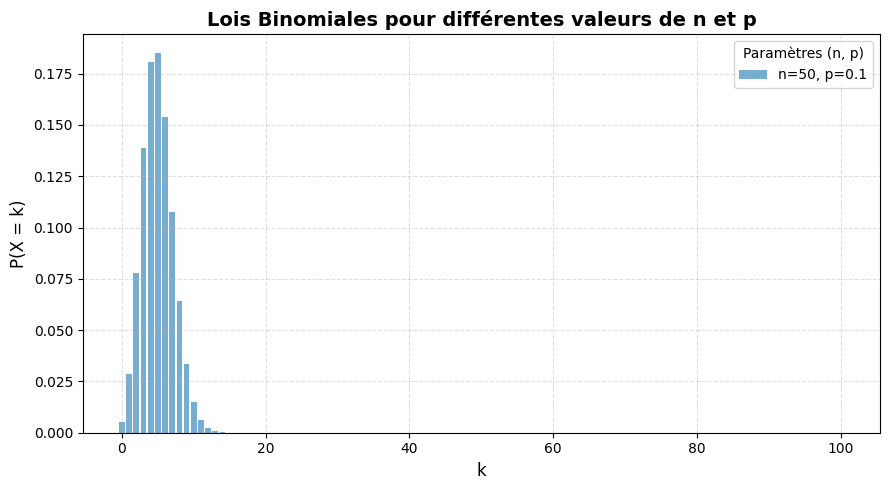

In [23]:
graphiques_binomiale(50, 0.1)

## <span id="lois-binomiales" style="color:#2471A3;">2) Lois binomiales</span>

Objectif : comparer la forme de la loi binomiale pour divers couples *(n, p)*.

Créer une fonction `graphiques_binomiale(n=50, p=0.1, kmax=100, *args)` :
- Par défaut : n=50, p=0.1.
- Possibilité de tracer plusieurs distributions pour des couples *(n, p)* différents.
- Comparer les formes obtenues en faisant varier p.


## <span id="lois-normales" style="color:#2471A3;">3) Lois normales</span>

Objectif : afficher la densité de plusieurs lois normales sur le même graphique.

Créer une fonction `graphiques_normale(mu=0, sigma=1, *args)` :
- Par défaut : N(0,1).
- Tracer les densités pour différents couples *(μ, σ)*.
- Comparer la dispersion et la position des distributions.


## <span id="convergence-binomiale--poisson" style="color:#1A5276;">4) Convergence Binomiale → Poisson</span>

Objectif : illustrer la convergence d’une loi binomiale vers une loi de Poisson.

Sur un même graphique :
- tracer la loi **de Poisson(λ)**,  
- tracer la loi **Binomiale(n, p)**.

Ajuster *n* et *p* pour que *Binomiale(n, p)* ≈ *Poisson(λ)*.  
La condition générale est :  
> n → ∞, p → 0, avec λ = n·p fixé.

## <span id="convergence-poisson--normale" style="color:#1A5276;">5) Convergence Poisson → Normale</span>

Objectif : montrer que pour λ grand, la loi de Poisson se rapproche d’une loi normale.

Tracer :
- Poisson(λ),
- Normale(μ = λ, σ = √λ).

Observer la convergence visuelle pour λ croissant.  
Condition :  
> λ grand ⇒ Poisson(λ) ≈ N(λ, λ).


## <span id="théorème-de-la-limite-centrée" style="color:#154360;">6) Théorème de la limite centrée</span>

Soit (Xₙ) une suite de variables aléatoires indépendantes et identiquement distribuées,
ayant la même espérance *m* et le même écart-type *σ*.

On définit :
\[
Sₙ = X₁ + X₂ + ... + Xₙ, \quad Sₙ^* = \frac{Sₙ - n·m}{σ·√n}
\]

Le théorème indique que Sₙ* converge en loi vers la loi normale centrée réduite N(0,1).

**Illustration graphique :**
- Simuler des sommes Sₙ pour différentes tailles d’échantillon *n*.  
- Tracer l’histogramme normalisé des Sₙ*.  
- Superposer la densité de N(0,1).  
- Montrer la convergence à mesure que *n* augmente.

Tester avec plusieurs distributions de départ : uniforme, Bernoulli, exponentielle, etc.


## <span id="conclusion" style="color:#1F618D;">Conclusion</span>

Ce travail met en évidence les grands résultats de convergence des probabilités :

- La **loi de Poisson** apparaît comme une limite de la **loi binomiale** lorsque les événements sont rares mais nombreux.  
- La **loi normale** peut être considérée comme une approximation de la **loi de Poisson** lorsque λ devient grand.  
- Enfin, le **théorème central limite** explique la tendance universelle à la normalité des sommes de variables aléatoires indépendantes.

Ces résultats illustrent la cohérence et la puissance unificatrice de la théorie des probabilités :
des modèles discrets ou hétérogènes tendent vers une même forme universelle — la loi normale — dès que le nombre d’observations augmente.
